In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity
import ast
import pandas as pd

In [2]:
df = pd.read_csv("file_path")

# Convert stringified lists in 'tokens' column back to real lists
df['tokens'] = df['tokens'].apply(ast.literal_eval)

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\pradh\AppData\Local\Temp\ipykernel_19804\2319990192.py:1: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv("E:\Academics\Semester-6\DS 203(Prog. for DS)\Project\Code\processed_df.csv")


In [3]:
# Reproducibility
random.seed(42)
np.random.seed(42)

# Sample 40 random indices
sample_indices = random.sample(list(df.index), 40)

# For storing metrics
euclidean_avgs = []
cosine_avgs = []
inferred_norms = []


# Common tagged data
tagged_data = [TaggedDocument(words=tokens, tags=[str(i)]) for i, tokens in zip(df.index, df['tokens'])]

In [4]:
for dm_type in [0, 1]:
    # Initialize and train Doc2Vec
    model = Doc2Vec(vector_size=350, window=5, min_count=1,
                    workers=4, dm=dm_type, epochs=3000)
    model.build_vocab(tagged_data)
    model.train(tagged_data, total_examples=model.corpus_count, epochs=1000)

    top5_euclidean = []
    top5_cosine = []
    norms = []

    for idx in sample_indices:
        inferred_vector = model.infer_vector(df.loc[idx, 'tokens'])
        norms.append(np.linalg.norm(inferred_vector))  # store norm of inferred vector
        distances = []

        for i in df.index:
            if i == idx:
                continue
            vec = model.dv[str(i)]
            dist = euclidean(inferred_vector, vec)
            distances.append((dist, i))

        # Top-5 closest by Euclidean distance
        top5 = sorted(distances)[:5]
        avg_euclid = sum([d[0] for d in top5]) / 5
        top5_euclidean.append(avg_euclid)

        # Corresponding cosine similarities
        cos_sims = []
        for _, i in top5:
            vec = model.dv[str(i)].reshape(1, -1)
            sim = cosine_similarity(inferred_vector.reshape(1, -1), vec)[0][0]
            cos_sims.append(sim)
        avg_cosine = sum(cos_sims) / 5
        top5_cosine.append(avg_cosine)

    euclidean_avgs.append(np.mean(top5_euclidean))
    cosine_avgs.append(np.mean(top5_cosine))
    inferred_norms.append(np.mean(norms))

C:\Users\pradh\AppData\Local\Temp\ipykernel_19804\4141965257.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dm_labels, y=euclidean_avgs, palette=['salmon', 'mediumseagreen'])


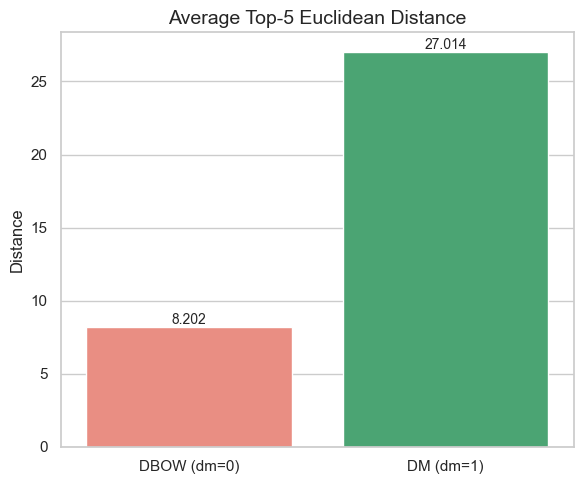

In [5]:
dm_labels = ['DBOW (dm=0)', 'DM (dm=1)']
sns.set_theme(style="whitegrid")

# Plot 1: Euclidean Distance
plt.figure(figsize=(6, 5))
sns.barplot(x=dm_labels, y=euclidean_avgs, palette=['salmon', 'mediumseagreen'])
plt.title("Average Top-5 Euclidean Distance", fontsize=14)
plt.ylabel("Distance", fontsize=12)
for i, val in enumerate(euclidean_avgs):
    plt.text(i, val + 0.005, f"{val:.3f}", ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

C:\Users\pradh\AppData\Local\Temp\ipykernel_19804\1394010605.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dm_labels, y=cosine_avgs, palette=['salmon', 'mediumseagreen'])


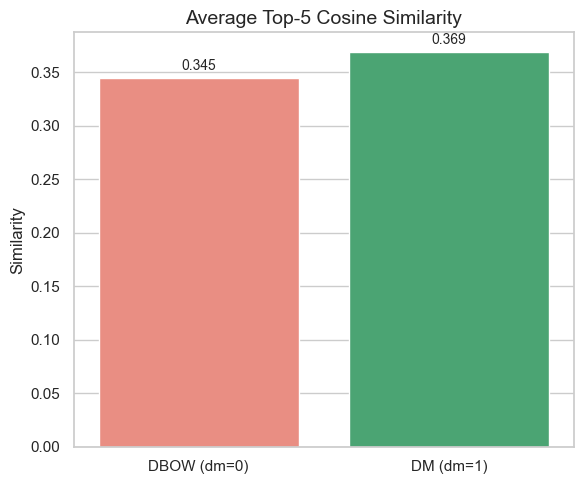

In [6]:

# Plot 2: Cosine Similarity
plt.figure(figsize=(6, 5))
sns.barplot(x=dm_labels, y=cosine_avgs, palette=['salmon', 'mediumseagreen'])
plt.title("Average Top-5 Cosine Similarity", fontsize=14)
plt.ylabel("Similarity", fontsize=12)
for i, val in enumerate(cosine_avgs):
    plt.text(i, val + 0.005, f"{val:.3f}", ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

C:\Users\pradh\AppData\Local\Temp\ipykernel_19804\2094498278.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dm_labels, y=inferred_norms, palette=['dodgerblue', 'orange'])


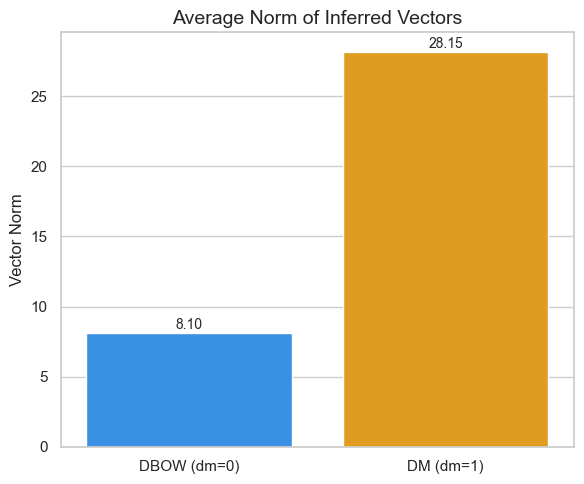

In [7]:
# 📊 Plot: Average Norms of Inferred Vectors
plt.figure(figsize=(6, 5))
sns.barplot(x=dm_labels, y=inferred_norms, palette=['dodgerblue', 'orange'])
plt.title("Average Norm of Inferred Vectors", fontsize=14)
plt.ylabel("Vector Norm", fontsize=12)
for i, val in enumerate(inferred_norms):
    plt.text(i, val + 0.1, f"{val:.2f}", ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()